## TO BE RUN IN KAGGLE

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import PIL #python imaging library enables python to perform different image operations
import tensorflow as tf #deep learning library enables to create neural networks
import matplotlib.pyplot as plt #for basic plotting

In [3]:
image = PIL.Image.open("/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1000_bacteria_2931.jpeg")

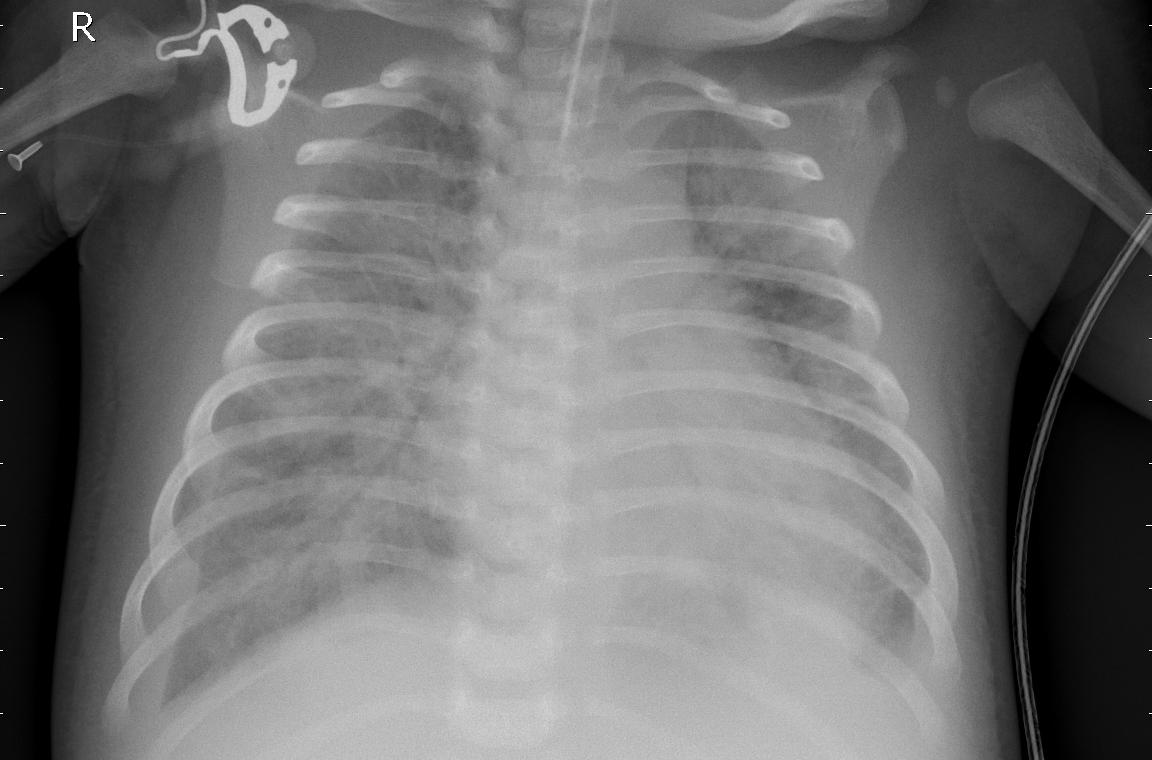

In [4]:
image

In [5]:
image = PIL.Image.open("/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0115-0001.jpeg")

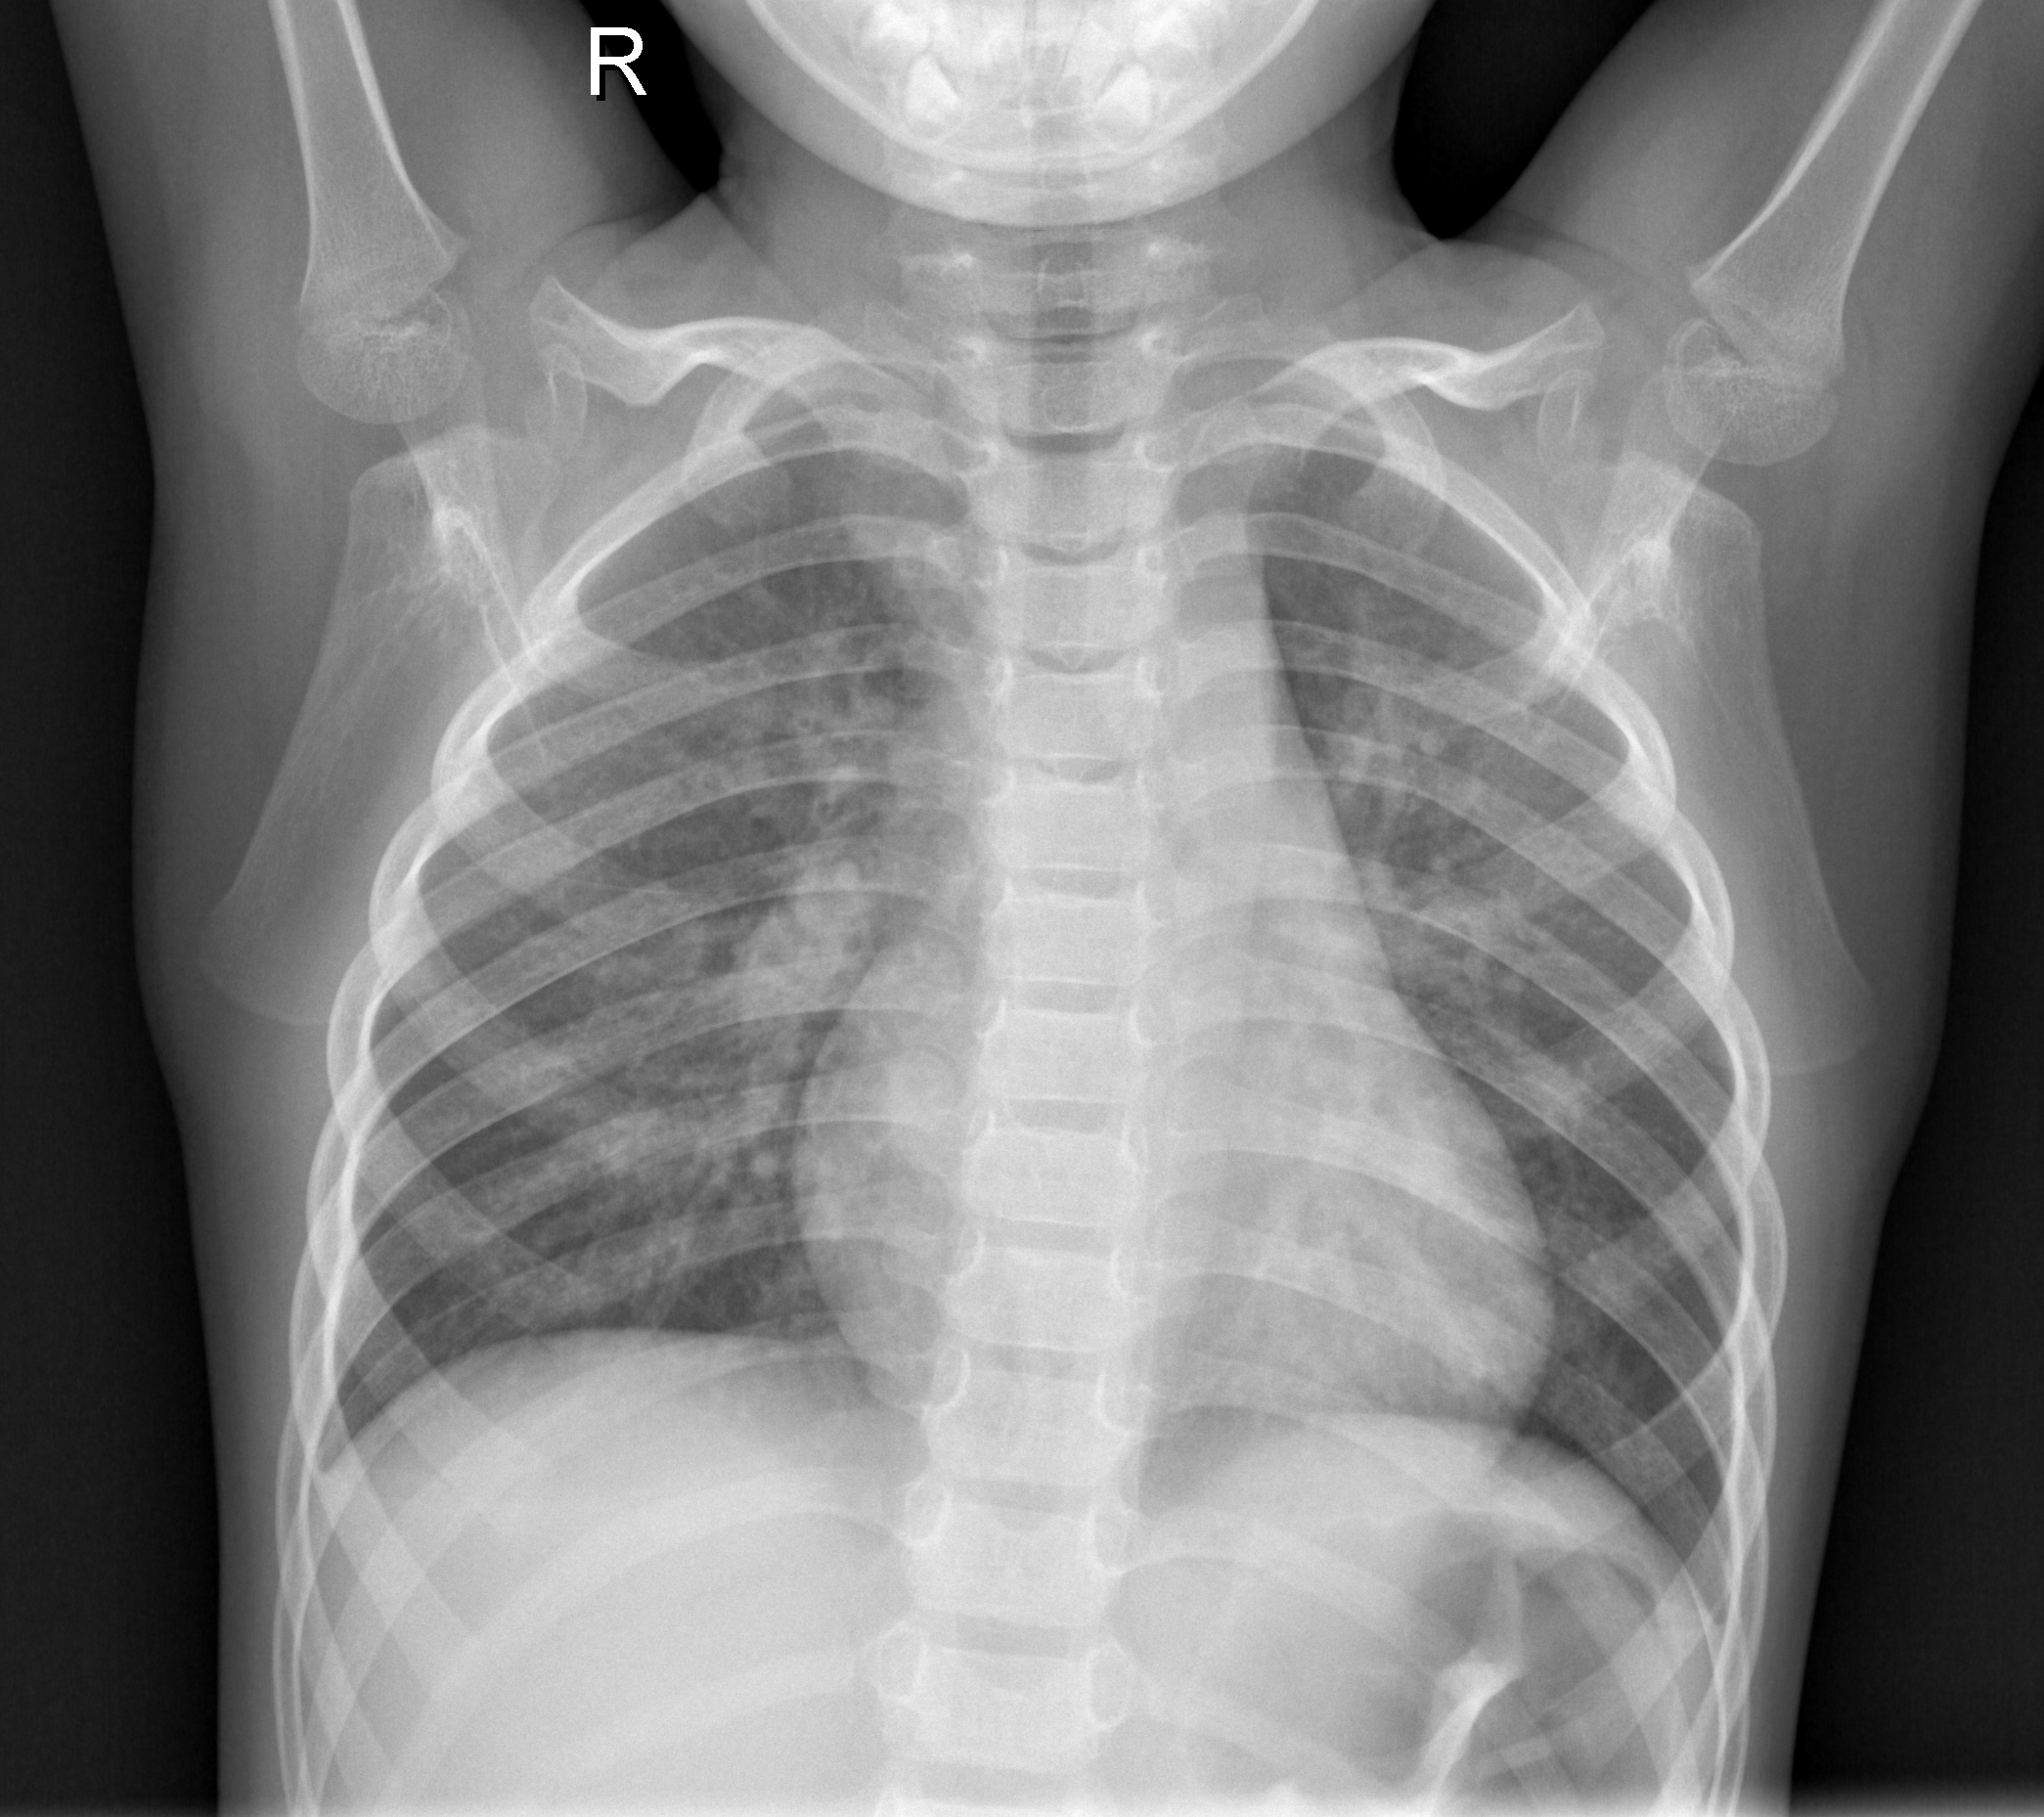

In [6]:
image

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator #take whole datset as a input and create 3 types of other image generators - train, validate, test


In [8]:
# to train the model
training_dir = "/kaggle/input/chest-xray-pneumonia/chest_xray/train/"
training_generator = ImageDataGenerator(rescale = 1/255) # rescale the images or divide each pixel to 255
data_train = training_generator.flow_from_directory(training_dir, target_size = (120, 120), batch_size = 8, class_mode = "binary") # load data from training directory to train the model


Found 5216 images belonging to 2 classes.


In [9]:
# Define validation generator
valid_dir = "/kaggle/input/chest-xray-pneumonia/chest_xray/val/"
validation_generator = ImageDataGenerator(rescale = 1/255)
data_valid = validation_generator.flow_from_directory(valid_dir, target_size = (120, 120), batch_size = 8, class_mode = "binary") #load data from validation directory


Found 16 images belonging to 2 classes.


In [10]:
# Define the test generator
test_dir = "/kaggle/input/chest-xray-pneumonia/chest_xray/test/"
test_generator = ImageDataGenerator(rescale = 1/255)
data_test = test_generator.flow_from_directory(test_dir, target_size = (120, 120), batch_size = 8, class_mode = "binary")

Found 624 images belonging to 2 classes.


## CNN


In [11]:
# build convolution neural network(CNN)
model = tf.keras.Sequential([tf.keras.layers.Conv2D(32, (3, 3), input_shape = (120, 120, 3), activation = "relu"),# #call sequential and give input of different types of layers
                            tf.keras.layers.MaxPooling2D(2, 2), # pooling layer define size of matrix obtained from convulation layer
                            tf.keras.layers.Conv2D(64, (3, 3), activation = "relu"), 
                            tf.keras.layers.MaxPooling2D(2, 2), 
                            tf.keras.layers.Conv2D(128, (3, 3), activation = "relu"), 
                            tf.keras.layers.MaxPooling2D(2, 2),
                            tf.keras.layers.Conv2D(256, (3, 3), activation = "relu"), 
                            tf.keras.layers.MaxPooling2D(2, 2),
                            tf.keras.layers.Conv2D(512, (3, 3), activation = "relu"),
                            tf.keras.layers.MaxPooling2D(2, 2),
                            tf.keras.layers.Flatten(),  # all the features should be converted to 1d array
                            tf.keras.layers.Dense(256, activation = "relu"),
                            tf.keras.layers.Dense(2, activation='softmax'),
                            tf.keras.layers.Dense(1, activation = "sigmoid")])  # Dense layer -> 1 what is extent that i/p image has lungs with pnuemonia and sigmoid for activation 
                                                    # define the no of filters the size of filters and shape of images


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 118, 118, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 59, 59, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 57, 57, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 3, 3, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           514 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,700,421 (6.49 MB)

 Trainable params: 1,700,421 (6.49 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), loss = "binary_crossentropy", metrics = ["acc"])

In [14]:
history = model.fit(data_train, epochs=2, validation_data=data_valid)


Epoch 1/2


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


652/652 ━━━━━━━━━━━━━━━━━━━━ 128s 191ms/step - acc: 0.7388 - loss: 0.5753 - val_acc: 0.5000 - val_loss: 0.8244
Epoch 2/2
652/652 ━━━━━━━━━━━━━━━━━━━━ 109s 167ms/step - acc: 0.7432 - loss: 0.5698 - val_acc: 0.5000 - val_loss: 0.8267


In [15]:
model.evaluate(data_test)

78/78 ━━━━━━━━━━━━━━━━━━━━ 10s 129ms/step - acc: 0.6116 - loss: 0.7088


[0.69460529088974, 0.625]

In [16]:
predictions = model.predict(data_test)

78/78 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step


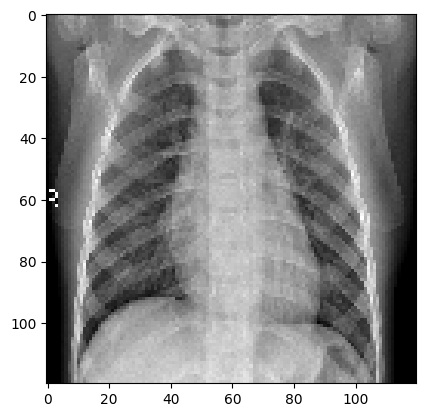

The probablility of pnueonia is: [0.7420865]


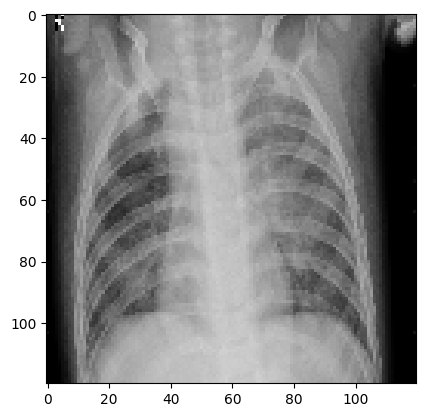

The probablility of pnueonia is: [0.7420865]


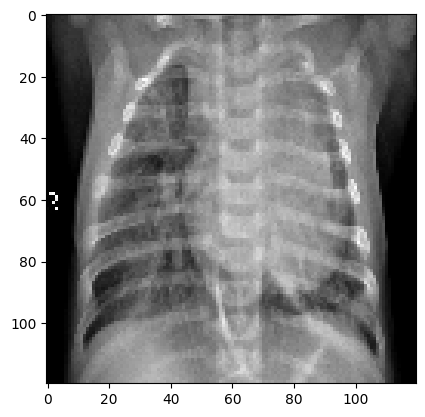

The probablility of pnueonia is: [0.7420865]


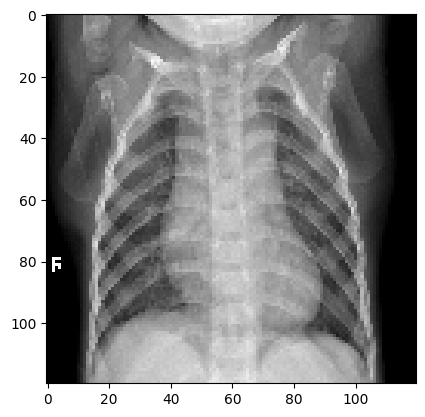

The probablility of pnueonia is: [0.7420865]


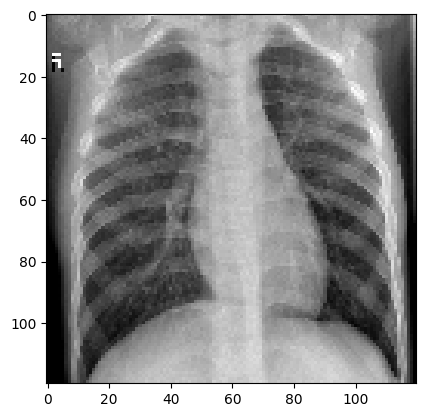

The probablility of pnueonia is: [0.7420865]


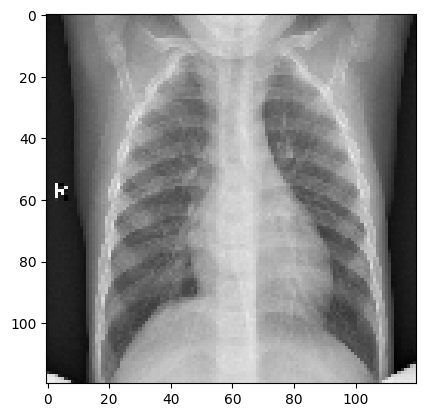

The probablility of pnueonia is: [0.7420865]


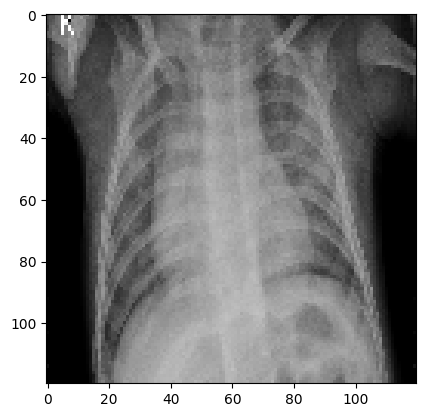

The probablility of pnueonia is: [0.7420865]


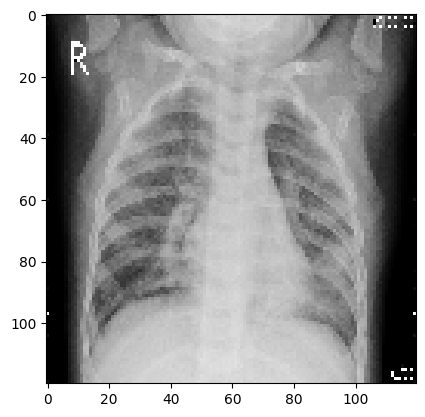

The probablility of pnueonia is: [0.7420865]


In [17]:
x = next(data_test) 
for i in range(0, 1):
    image = x[i]
    for j in range(0, 8):
        plt.imshow(image[j])
        plt.show()
        print("The probablility of pnueonia is:", predictions[j])

In [18]:
import datetime, pytz; 
print("Current Time in IST:", datetime.datetime.now(pytz.utc).astimezone(pytz.timezone('Asia/Kolkata')).strftime('%Y-%m-%d %H:%M:%S'))

Current Time in IST: 2025-02-12 23:31:04
